In [1]:
'''
    Author: A.Shrikant
'''

'\n    Author: A.Shrikant\n'

## Time Series Analysis on Airline-Passengers Dataset:

### Here we use 12 Years of airline passengers data to build a model that could forecast for the next 1 year the number of Passengers boarding the plane every month.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_airline = pd.read_csv("..\\Statistics_and_ML\\dataset\\airline-passengers.csv")

In [4]:
df_airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df_airline.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


### We have 12 Years of Airline Passenger data starting from the year Jan 1949 to Dec 1960. The periodicity of the observations is 1 month. 

In [6]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


### No missing values detected.

In [7]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [8]:
df_airline.set_index('Month', inplace=True)

In [9]:
# This step is necessary otherwise we would get this below warning while using SARIMAX().
# ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
#   self._init_dates(dates, freq)
df_airline.index.freq = pd.infer_freq(df_airline.index)

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


## Plotting the time series:

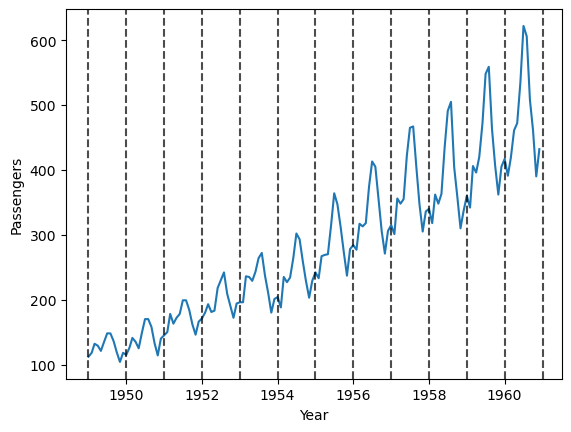

In [11]:
plt.figure()
plt.plot(df_airline)
plt.xlabel('Year')
plt.ylabel('Passengers')


# matplotlib.pyplot.axvline(x=0, ymin=0, ymax=1, **kwargs)
# Add a vertical line across the Axes.
# x position in data coordinates of the vertical line
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html
# Since the index for the time series has been set to DateTimeIndex therefore
# each x-coordinate is of type 'pandas._libs.tslibs.timestamps.Timestamp'.
for year in range(1949, 1962):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.7)

plt.show()

### Inference: Data clearly shows an increasing trend and seasonality. Seasonality is easily seen by the occurrence of peaks at seemingly regular intervals of time. Seasonal frequency is 12 periods or 12 months.

## Potting the trend, seasonal and residual components separately:

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 640x480 with 0 Axes>

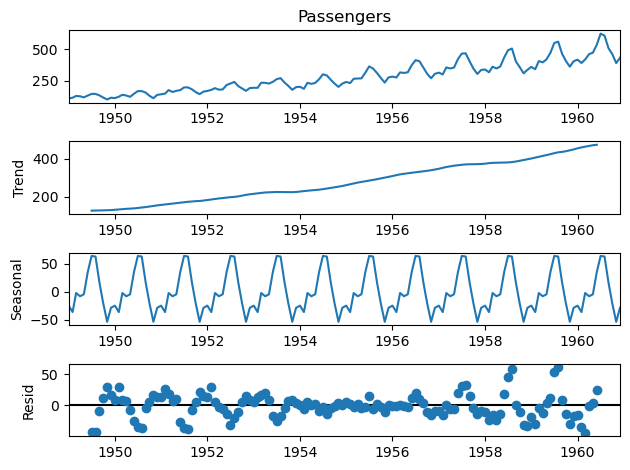

In [13]:
ts_decomposed_result = seasonal_decompose(df_airline['Passengers'], model='additive', period=12)

plt.figure()
ts_decomposed_result.plot()
plt.show()

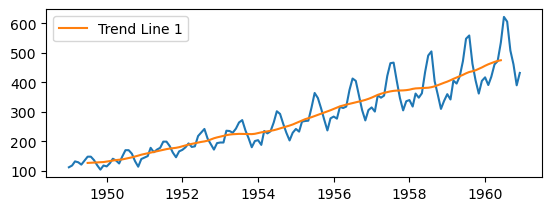

In [14]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(df_airline['Passengers'])
plt.plot(ts_decomposed_result.trend, label="Trend Line 1")
plt.legend()
plt.show()

## Checking for constant mean and constant variance in the series using Rolling Window:

In [15]:
rolling_window_period = 12
rolling_mean = df_airline['Passengers'].rolling(rolling_window_period).mean()
rolling_mean

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
                 ...    
1960-08-01    463.333333
1960-09-01    467.083333
1960-10-01    471.583333
1960-11-01    473.916667
1960-12-01    476.166667
Freq: MS, Name: Passengers, Length: 144, dtype: float64

In [16]:
rolling_mean.isna().sum()

11

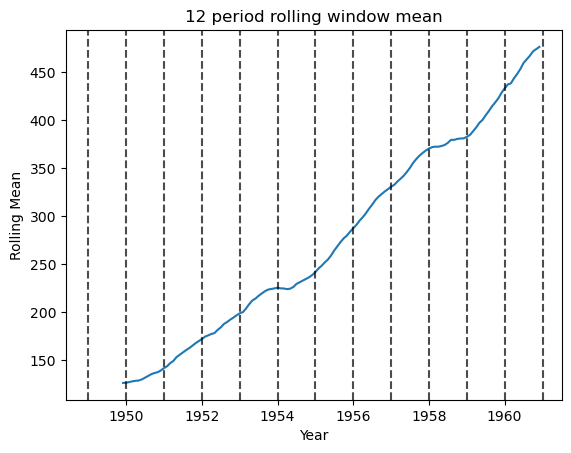

In [17]:
plt.figure()
plt.plot(rolling_mean)
plt.xlabel('Year')
plt.ylabel('Rolling Mean')
plt.title(f'{rolling_window_period} period rolling window mean')

for year in range(1949, 1962):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.7)
    
plt.show()

In [18]:
rolling_mean.head(30)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
Freq: MS, Name: Passengers, dtype: float64

### Mean is not constant across time it varies greatly w.r.t. time which again confirms that the time series is not Stationary.

In [19]:
rolling_variance = df_airline['Passengers'].rolling(rolling_window_period).var()
rolling_variance

Month
1949-01-01            NaN
1949-02-01            NaN
1949-03-01            NaN
1949-04-01            NaN
1949-05-01            NaN
                 ...     
1960-08-01    6994.060606
1960-09-01    7160.083333
1960-10-01    6813.174242
1960-11-01    6320.628788
1960-12-01    6043.060606
Freq: MS, Name: Passengers, Length: 144, dtype: float64

In [20]:
rolling_variance.isna().sum()

11

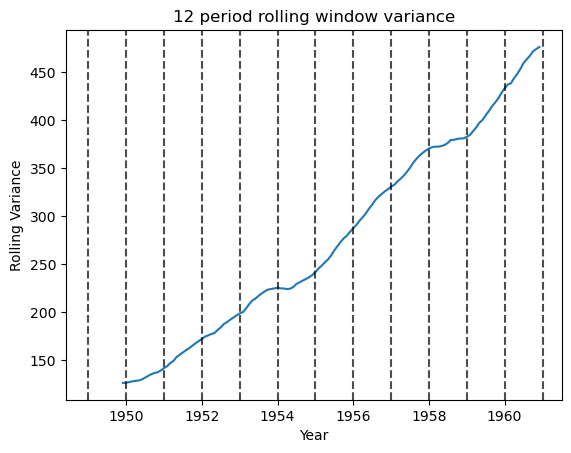

In [21]:
plt.figure()
plt.plot(rolling_mean)
plt.xlabel('Year')
plt.ylabel('Rolling Variance')
plt.title(f'{rolling_window_period} period rolling window variance')

for year in range(1949, 1962):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.7)

plt.show()

### Variance is not constant across time it varies greatly w.r.t. time which again confirms that the time series is not Stationary.

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
def perform_adf_test(series, regression='c'):
    keys = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical values', 'icbest', 'resstore']
    result = adfuller(series, regression=regression)
    for i in range(len(result)):
        print(f"{keys[i]}: {result[i]}")

$ \text{Model used by the ADF(Augmented Dickey Fuller) test is:} $

$ \Delta y_{t} = \alpha + \beta t + \gamma y_{t-1} + \delta _{1}\Delta y_{t-1} + ... + \delta _{p-1}\Delta y_{t-p+1} + e_{t} $

$ \text{H}_0\text{: } \gamma \text{(Co-efficient of the term} y_{t-1} \text{) = 0} $

$ \text{H} _1\text{: } \gamma  < 0 $

$ \text{Let us assume the significance level to be 0.05 i.e. 5%.} $

In [24]:
perform_adf_test(df_airline['Passengers'], 'ct')

adf: -2.1007818138446694
pvalue: 0.5456589343124553
usedlag: 13
nobs: 130
critical values: {'1%': -4.030152423759672, '5%': -3.444817634956759, '10%': -3.1471816659080565}
icbest: 993.2814778200581


$ \text{Since the p-value is  > 0.05(our assumed significance level) this implies that we can't reject} \\
\text{the null hypothesis H} _{0}\text{. So the time series is non-stationary.} $

## Approach 1 to find parameters for (p,d,q,P,D,Q) for SARIMA model:

### Apply non-seasonal differencing i.e. perform the operation (1-L) * Y_t to get Z_t where L is the Lag operator:

In [25]:
df1 = df_airline.copy()
df1["Passengers_diff_1"] = df_airline['Passengers'].diff(1)

In [26]:
df1["Passengers_diff_1"].isna().sum()

1

In [27]:
df1 = df1.dropna()

In [28]:
df1

,Passengers,Passengers_diff_1
Month,,
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0
1949-06-01,135,14.0
...,...,...
1960-08-01,606,-16.0
1960-09-01,508,-98.0
1960-10-01,461,-47.0


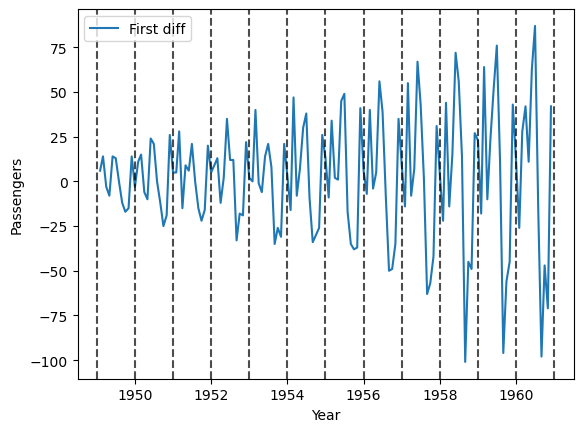

In [29]:
plt.figure()
# plt.plot(df1['Passengers'], label='Actual')
plt.plot(df1['Passengers_diff_1'], label='First diff')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()

for year in range(1949, 1962):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.7)

plt.show()

In [30]:
perform_adf_test(df1['Passengers_diff_1'])

adf: -2.8292668241700034
pvalue: 0.054213290283824954
usedlag: 12
nobs: 130
critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
icbest: 988.5069317854084


### Again p-value is > 0.05 which implies that the first difference time series is still non-stationary.

### Apply non-seasonal differencing again on Z_t i.e. perform the operation (1-L) * Z_t to get W_t:

In [31]:
df2 = df1.copy()
df2["Passengers_diff_2"] = df1['Passengers_diff_1'].diff(1)

In [32]:
df2["Passengers_diff_2"].isna().sum()

1

In [33]:
df2 = df2.dropna()

In [34]:
df2

,Passengers,Passengers_diff_1,Passengers_diff_2
Month,,,
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0
1949-07-01,148,13.0,-1.0
...,...,...,...
1960-08-01,606,-16.0,-103.0
1960-09-01,508,-98.0,-82.0
1960-10-01,461,-47.0,51.0


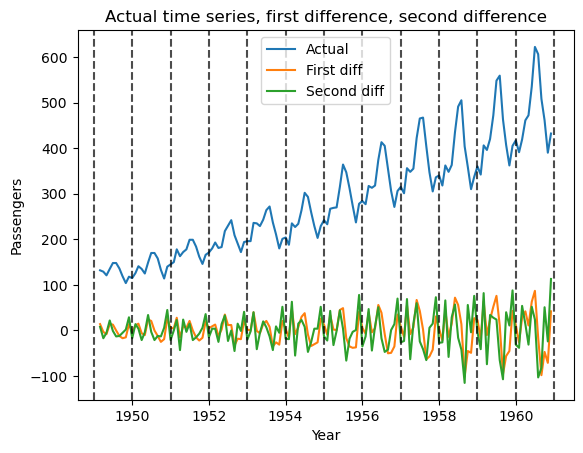

In [35]:
plt.figure()
plt.plot(df2['Passengers'], label='Actual')
plt.plot(df2['Passengers_diff_1'], label='First diff')
plt.plot(df2['Passengers_diff_2'], label='Second diff')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.title('Actual time series, first difference, second difference')
plt.legend()

for year in range(1949, 1962):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.7)

plt.show()

In [36]:
perform_adf_test(df2['Passengers_diff_2'])

adf: -16.384231542468488
pvalue: 2.7328918500143186e-29
usedlag: 11
nobs: 130
critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
icbest: 988.6020417275604


$ \text{Since the p-value is almost 0 which is  < 0.05(our assumed significance level) this implies that we can reject } \\
\text{the null hypothesis H} _{0}\text{. So after differencing the time series 2 times the resulting series is now stationary.} $

### Analyze the ACF and PACF of the series W_t = (1-L)^2 * Y_t:

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

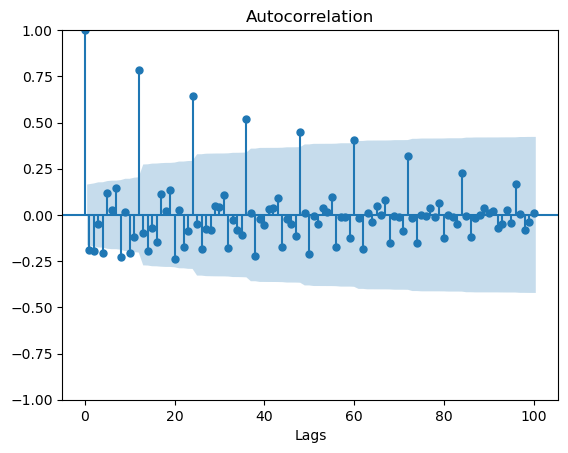

In [38]:
plot_acf(df2['Passengers_diff_2'], lags = 100)
plt.xlabel('Lags')
plt.show()

### The autocorrelation is decreasing at multiples of seasonal lags. This implies that more number of seasonal moving average terms are required. We could try seasonal lags of 1,2,3,4,5 as values for Q. 

### After Y_t-1 and Y_t-2  non-seasonal lags the autocorrelation reduces rapidly indicating that the first 2 non-seasonal moving average terms are required i.e. q=2.

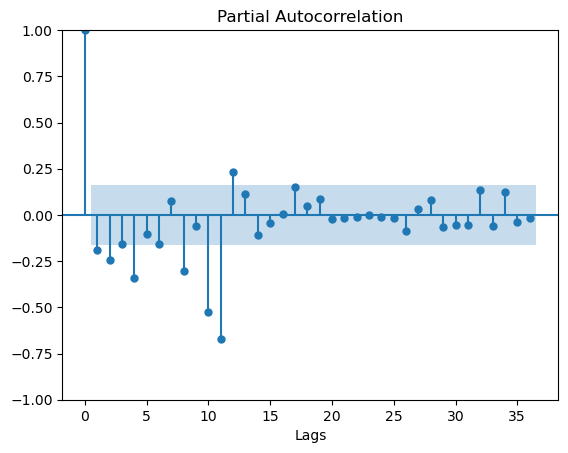

In [39]:
plot_pacf(df2['Passengers_diff_2'], method='ywm', lags=36)
plt.xlabel('Lags')
plt.show()

### For lags 2,4,8 we see spikes that are significant. So we could try these values for p.

### Only at seasonal lag at 12 we see a spike that is significant. So P=1.

## Approach 2 to find parameters for (p,d,q,P,D,Q) for SARIMA model:

### Applying seasonal differencing on the original time series Y_t to get Z_t i.e. perform the operation (1-L^12) * Y_t where L is the Lag operator:

In [40]:
df3 = df_airline.copy()
seasonal_frequency = 12
df3["Passengers_seasonal_diff"] = (df_airline['Passengers'] - 
                                   df_airline['Passengers'].shift(seasonal_frequency))

In [41]:
df3['Passengers_seasonal_diff'].isna().sum()

12

In [42]:
df3.dropna(inplace=True)

In [43]:
df3

,Passengers,Passengers_seasonal_diff
Month,,
1950-01-01,115,3.0
1950-02-01,126,8.0
1950-03-01,141,9.0
1950-04-01,135,6.0
1950-05-01,125,4.0
...,...,...
1960-08-01,606,47.0
1960-09-01,508,45.0
1960-10-01,461,54.0


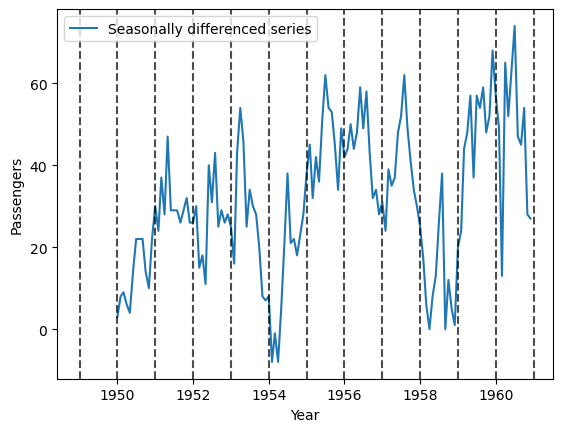

In [44]:
plt.figure()
# plt.plot(df3['Passengers'], label='Actual')
plt.plot(df3['Passengers_seasonal_diff'], label='Seasonally differenced series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()

for year in range(1949, 1962):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--', alpha=0.7)

plt.show()

In [45]:
df_airline['Passengers'].diff(12).head(30)

Month
1949-01-01     NaN
1949-02-01     NaN
1949-03-01     NaN
1949-04-01     NaN
1949-05-01     NaN
1949-06-01     NaN
1949-07-01     NaN
1949-08-01     NaN
1949-09-01     NaN
1949-10-01     NaN
1949-11-01     NaN
1949-12-01     NaN
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
1951-02-01    24.0
1951-03-01    37.0
1951-04-01    28.0
1951-05-01    47.0
1951-06-01    29.0
Freq: MS, Name: Passengers, dtype: float64

In [46]:
perform_adf_test(df3['Passengers_seasonal_diff'])

adf: -3.3830207264924805
pvalue: 0.011551493085514982
usedlag: 1
nobs: 130
critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
icbest: 919.527129208137


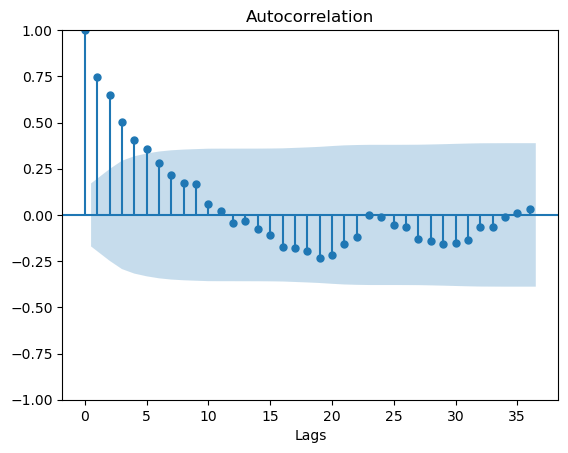

In [47]:
plot_acf(df3['Passengers_seasonal_diff'], lags=36)
plt.xlabel('Lags')
plt.show()

### For non-seasonal MA terms possible values of q are 1,2,3,4,5 after which the lag terms become insignificant.

### For seasonal MA terms, we do not see any significant spike at any seasonal lags that is at lag 12 or lag 24 etc. So Q=0.

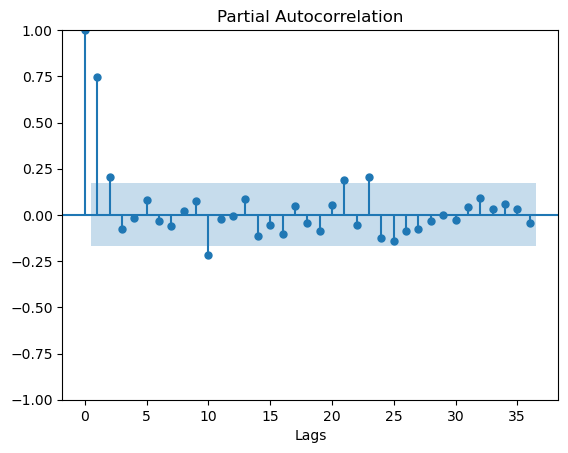

In [48]:
plot_pacf(df3['Passengers_seasonal_diff'], method='ywm', lags=36)
plt.xlabel('Lags')
plt.show()

### For non-seasonal AR terms, possible values of p are 1, 2 after which the lag terms become insignificant.

### For seasonal AR terms, we do not see any significant spike at any seasonal lags that is at lag 12 or lag 24 etc. So P=0.

In [49]:
perform_adf_test(df3['Passengers_seasonal_diff'])

adf: -3.3830207264924805
pvalue: 0.011551493085514982
usedlag: 1
nobs: 130
critical values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
icbest: 919.527129208137


## Getting the training and test data for trying out time series models:

In [50]:
from datetime import timedelta

## Using the data from 1 Jan 1949 to 31 Dec 1959 as training data.

## Using the data from 1 Jan 1960 to 31 Dec 1960 as training data.

In [51]:
train_end = pd.to_datetime("1959-12-31")
test_end = pd.to_datetime("1960-12-31")

train_data = df_airline[:train_end]
test_data = df_airline[train_end + timedelta(days=1):test_end]

In [52]:
train_data

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [53]:
test_data

,Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


## Approach 3 using grid search to find parameters for (p,d,q,P,D,Q) for SARIMA model:

In [54]:
import itertools

In [55]:
p = q = d = range(0,2)

In [56]:
# itertools.product(p,d,q)
# Returns the cartesian product of input iterables. Equivalent to nested for-loops.
pdq = list(itertools.product(p,d,q))
print("pdq combinations:")
print(pdq)

pdq combinations:
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]


In [57]:
P = D = Q = range(0,2)

In [58]:
PDQF = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print(PDQF)

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
aic_dict = dict()
for param in pdq:
    for seasonal_parameter in PDQF:
        sarima_model = SARIMAX(train_data, 
                               order=param, 
                               seasonal_order=seasonal_parameter, 
                               enforce_stationarity=False, 
                               enforce_invertibility=False
                              )
        result = sarima_model.fit()
        print(f"{param}x{seasonal_parameter}) - AIC: {result.aic}")
        aic_dict.update({(param, seasonal_parameter): result.aic})

(0, 0, 0)x(0, 0, 0, 12)) - AIC: 1853.867132204165
(0, 0, 0)x(0, 0, 1, 12)) - AIC: 1575.2927100520965
(0, 0, 0)x(0, 1, 0, 12)) - AIC: 1183.7768361260032
(0, 0, 0)x(0, 1, 1, 12)) - AIC: 1039.3684612710686
(0, 0, 0)x(1, 0, 0, 12)) - AIC: 1018.1128824449078
(0, 0, 0)x(1, 0, 1, 12)) - AIC: 1008.0082399524545
(0, 0, 0)x(1, 1, 0, 12)) - AIC: 999.189649490497
(0, 0, 0)x(1, 1, 1, 12)) - AIC: 930.7565628459528
(0, 0, 1)x(0, 0, 0, 12)) - AIC: 1670.9731705571419
(0, 0, 1)x(0, 0, 1, 12)) - AIC: 1409.6308436189208
(0, 0, 1)x(0, 1, 0, 12)) - AIC: 1071.9868359596408
(0, 0, 1)x(0, 1, 1, 12)) - AIC: 954.9732785958571
(0, 0, 1)x(1, 0, 0, 12)) - AIC: 962.7908430127964
(0, 0, 1)x(1, 0, 1, 12)) - AIC: 941.9746021501135
(0, 0, 1)x(1, 1, 0, 12)) - AIC: 947.4386036577736
(0, 0, 1)x(1, 1, 1, 12)) - AIC: 876.8976472270055
(0, 1, 0)x(0, 0, 0, 12)) - AIC: 1267.4912483529856
(0, 1, 0)x(0, 0, 1, 12)) - AIC: 1066.5001391578778
(0, 1, 0)x(0, 1, 0, 12)) - AIC: 898.2577377990535
(0, 1, 0)x(0, 1, 1, 12)) - AIC: 814.96615

In [61]:
# Sorting the dictionary according to keys.
aic_dict = dict(sorted(aic_dict.items(), key=lambda item: item[1]))
aic_dict

{((0, 1, 1), (1, 1, 1, 12)): 802.8580194673696,
 ((1, 1, 1), (1, 1, 1, 12)): 803.3627295936262,
 ((0, 1, 1), (0, 1, 1, 12)): 803.4111310810478,
 ((1, 1, 1), (0, 1, 1, 12)): 803.7012277205246,
 ((1, 1, 0), (1, 1, 1, 12)): 810.0538746711336,
 ((1, 1, 0), (1, 1, 0, 12)): 810.1697343725327,
 ((1, 1, 0), (0, 1, 1, 12)): 810.3950674867854,
 ((1, 1, 1), (1, 1, 0, 12)): 811.2171076081977,
 ((1, 0, 1), (0, 1, 1, 12)): 812.9279426161573,
 ((0, 1, 0), (0, 1, 1, 12)): 814.9661546286915,
 ((0, 1, 0), (1, 1, 1, 12)): 815.1388167150715,
 ((0, 1, 1), (1, 1, 0, 12)): 817.7933920131462,
 ((1, 0, 1), (1, 1, 1, 12)): 819.4243737233215,
 ((1, 0, 1), (1, 1, 0, 12)): 819.4447145085644,
 ((0, 1, 0), (1, 1, 0, 12)): 821.6405586698072,
 ((1, 0, 0), (1, 1, 0, 12)): 822.5432823654064,
 ((1, 0, 0), (0, 1, 1, 12)): 822.7598554087126,
 ((1, 0, 0), (1, 1, 1, 12)): 831.3170042691104,
 ((0, 1, 1), (1, 0, 1, 12)): 863.2617743136642,
 ((1, 1, 1), (1, 0, 1, 12)): 864.4184468797822,
 ((1, 0, 1), (1, 0, 1, 12)): 867.7584454

In [62]:
# (0,1,1) (1,1,1,12) - From Grid Search.
# (2,2,2) (1,0,1,12) - From the acf and pacf of (1-L)^2 * Y_t series.
# (2,0,5) (0,1,0,12) - From the acf and pacf of (1-L^12) * Y_t series.

orders = [(0,1,1), (2,2,2), (2,0,5)]
seasonal_orders = [(1,1,1,12), (1,0,1,12), (0,1,0,12)]
results = []

for i in range(len(orders)):
    sarima_model = SARIMAX(train_data, 
                                   order=orders[i], 
                                   seasonal_order=seasonal_orders[i], 
                                   enforce_stationarity=False, 
                                   enforce_invertibility=False
                                  )

    result = sarima_model.fit()
    results.append(result)
    print(f"{orders[i]}{seasonal_orders[i]}")
    print(f"AIC: {result.aic}")

(0, 1, 1)(1, 1, 1, 12)
AIC: 802.8580194673696
(2, 2, 2)(1, 0, 1, 12)
AIC: 860.4523841098804
(2, 0, 5)(0, 1, 0, 12)
AIC: 866.6444026938915


## ARIMA(0, 1, 1)(1, 1, 1)12 has the lowest AIC value out of the parameters we tried so we go with this model.

In [63]:
for result in results:
    print(result.summary())
    print("\n\n")

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -397.429
Date:                            Fri, 29 Dec 2023   AIC                            802.858
Time:                                    11:19:59   BIC                            813.474
Sample:                                01-01-1949   HQIC                           807.160
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2380      0.087     -2.735      0.006      -0.409      -0.067
ar.S.L12      -0.6332      0.166   

In [64]:
# Getting the start and end dates for prediction.
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(f'pred_start_date: {pred_start_date}')
print(f'pred_end_date: {pred_end_date}')

pred_start_date: 1960-01-01 00:00:00
pred_end_date: 1960-12-01 00:00:00


In [65]:
# predictions is a pandas Series object.
predictions = results[0].predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Passengers'] - predictions

In [66]:
predictions

1960-01-01    422.522544
1960-02-01    404.089924
1960-03-01    466.170683
1960-04-01    455.600327
1960-05-01    479.380371
1960-06-01    532.876304
1960-07-01    607.846748
1960-08-01    619.393009
1960-09-01    521.772779
1960-10-01    466.984277
1960-11-01    421.747837
1960-12-01    463.563553
Freq: MS, Name: predicted_mean, dtype: float64

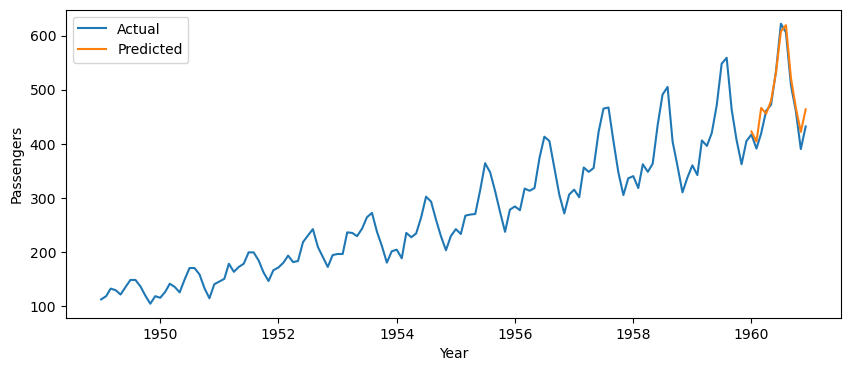

In [67]:
plt.figure(figsize=(10,4))
plt.plot(df_airline['Passengers'], label="Actual")
# plt.plot(test_data['Passengers'], label="Actual")
plt.plot(predictions, label="Predicted")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()

plt.show()

In [68]:
# References:
# https://online.stat.psu.edu/stat510/lesson/4/4.1
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX

## Evaluating the model performance:

In [69]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [70]:
mean_absolute_error(test_data['Passengers'], predictions)

15.941799825319455

In [71]:
mean_absolute_percentage_error(test_data['Passengers'], predictions)

0.0358363393098052

In [72]:
np.sqrt(mean_squared_error(test_data['Passengers'], predictions))

20.6648365631335

## Conclusion:

**ARIMA(0, 1, 1)(1, 1, 1)12** model is the best to capture the trend and seasonality present in the data.

Metric used to select best models are:
- AIC
- MAD(Mean Absolute Deviation)

The best parameters obtained for SARIMA while keeping the complexity of the model simple in concern are:

**From the grid search method:**
   - Model: ARIMA(0, 1, 1)(1, 1, 1)12
   - AIC: 802.86 

**From approach 1 using ACF and PACF of (1-L)^2 * Y_t:**
   - Model: ARIMA(2, 2, 2)(1, 0, 1)12
   - AIC: 860.45

**From approach 2 using ACF and PACF of (1-L^12) * Y_t:**
   - Model: ARIMA(2, 0, 5)(0, 1, 0)12
   - AIC: 866.64